# 49. カーネル密度関数

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

※カーネル密度推定：データのあるところに、カーネル関数を足し合わせて山の高さを滑らかに表現

In [2]:
dataset = randn(25)

(0, 1)

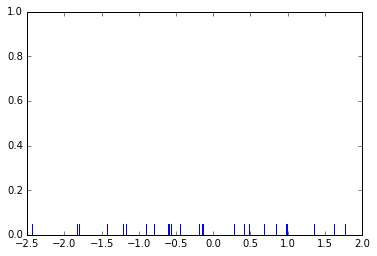

In [3]:
# rugplotを書く
sns.rugplot(dataset)
plt.ylim(0, 1)

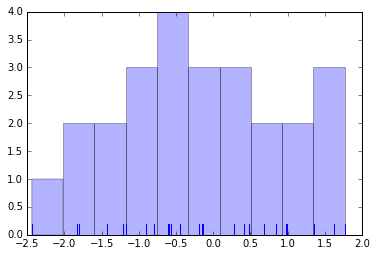

In [4]:
# ヒストグラムを重ねる
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

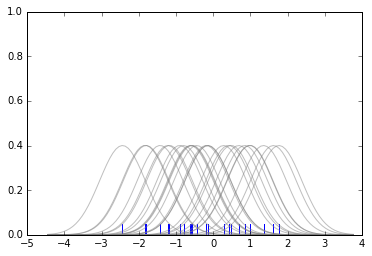

In [8]:
sns.rugplot(dataset);

# x軸を設定
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 全体を等間隔に100分割する
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []

for data_point in dataset:
    
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color = 'grey', alpha=0.5)

plt.ylim(0,1)

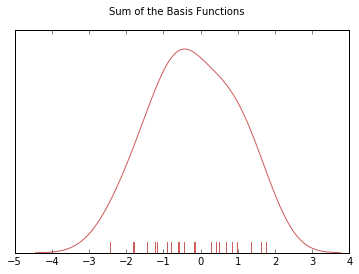

In [9]:
# 手動でKDEを作ります。
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset, c = 'indianred')

plt.yticks([])

plt.suptitle("Sum of the Basis Functions")

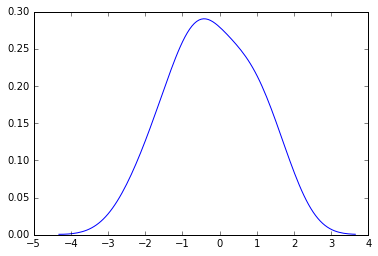

In [10]:
# これが1行で出来る
sns.kdeplot(dataset)

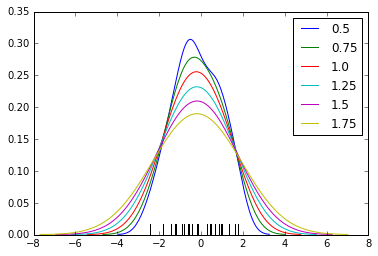

In [11]:
# バンド幅の話

sns.rugplot(dataset, color='black')
# バンド幅を変えてみましょう。
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

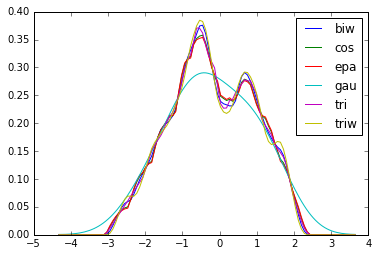

In [12]:
# カーネル関数の話

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)

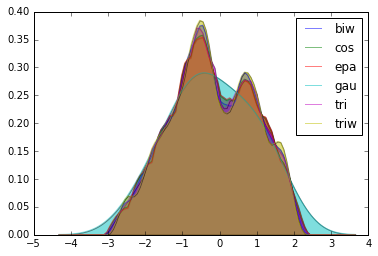

In [13]:
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True, alpha=0.5)

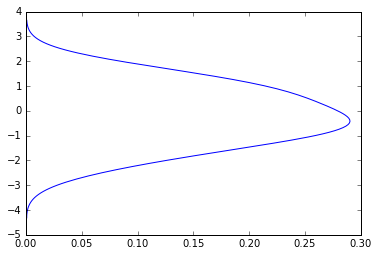

In [14]:
# 軸を入れ替えることもできる
sns.kdeplot(dataset, vertical = True)

(array([  1.,   3.,   5.,   8.,  12.,  15.,  18.,  20.,  22.,  25.]),
 array([-2.43836689, -2.01773704, -1.59710719, -1.17647734, -0.75584749,
        -0.33521764,  0.08541221,  0.50604206,  0.92667191,  1.34730177,
         1.76793162]),
 <a list of 10 Patch objects>)

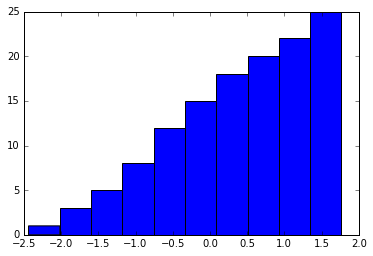

In [15]:
# 累積分布関数
plt.hist(dataset, cumulative = True)

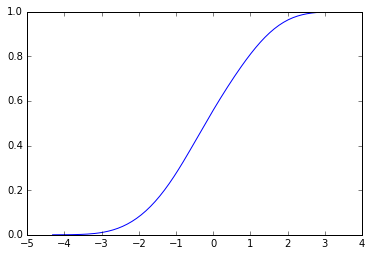

In [16]:
sns.kdeplot(dataset, cumulative = True)

In [17]:
# 2次元平面上の中心
mean = [0, 0]

#　それぞれの分散を求める
cov = [[1, 0], [0, 100]]

In [18]:
# これに従う多変量正規分布
dataset2 = np.random.multivariate_normal(mean, cov, 1000)
dataset2

array([[-0.02628098,  9.33929739],
       [-0.79180984, -8.27121928],
       [-0.64717566, -7.2672105 ],
       ..., 
       [-1.14317178, -9.44950525],
       [ 3.35296391,  5.64196535],
       [-2.17937206, -2.91453477]])

In [21]:
# DataFrameにしておく
dframe = pd.DataFrame(dataset2, columns = ['X', 'Y'])
dframe.head()

,X,Y
0,-0.026281,9.339297
1,-0.791810,-8.271219
2,-0.647176,-7.267210
3,-1.589136,4.336372
4,-0.884125,-4.549092


/Users/kymatsum/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


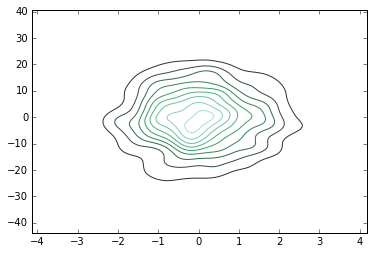

In [22]:
# プロットする。SeabornとPandasの相性は抜群
sns.kdeplot(dframe)

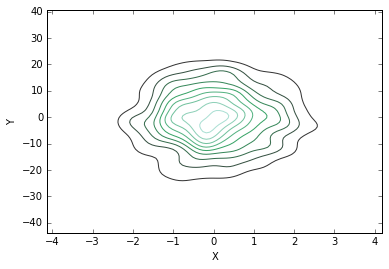

In [23]:
# 軸ごとにデータを渡せる
sns.kdeplot(dframe.X, dframe.Y)

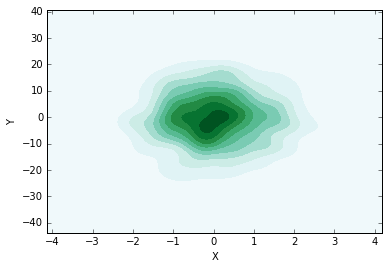

In [24]:
sns.kdeplot(dframe.X, dframe.Y, shade = True)

/Users/kymatsum/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


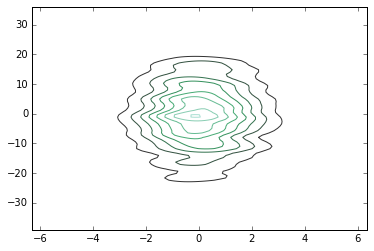

In [25]:
# バンド幅を変えられる
sns.kdeplot(dframe, bw = 1)

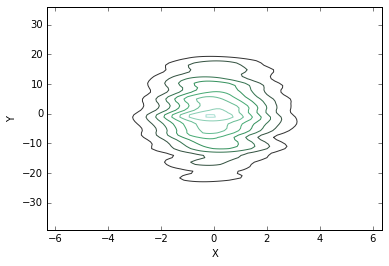

In [26]:
sns.kdeplot(dframe.X, dframe.Y, bw = 1)

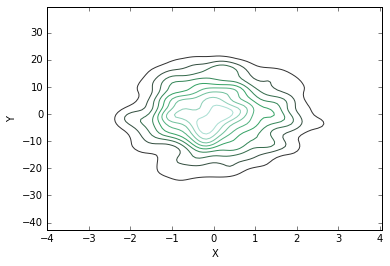

In [27]:
# 文字列でも渡せる
sns.kdeplot(dframe.X, dframe.Y, bw = 'silverman')

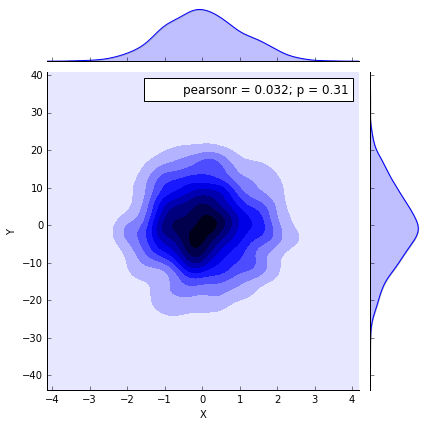

In [28]:
# 同時分布の推定も可能
sns.jointplot('X', 'Y', dframe, kind = 'kde')